In [4]:
#Student Name: Pavan Aditya
# Student ID: 202106932
#Student Email: x2021hbp@stfx.ca

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [5]:
# We read the csv files of train and test
training_data = pd.read_csv('/titanic/train.csv')
test_data= pd.read_csv('/titanic/test.csv')

In [6]:
training_data.head(10) # Displays Top 10 records from the Input data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
training_data.info() # Summary on the list of columns and their datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
training_data.describe() #For basic summary of statistics of all the numeric columns in our trained data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
missing_data = training_data[training_data.isnull().any(axis=1)] # This says that We have some missing data in Age and Cabin columns

In [10]:
print(missing_data)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

<AxesSubplot:>

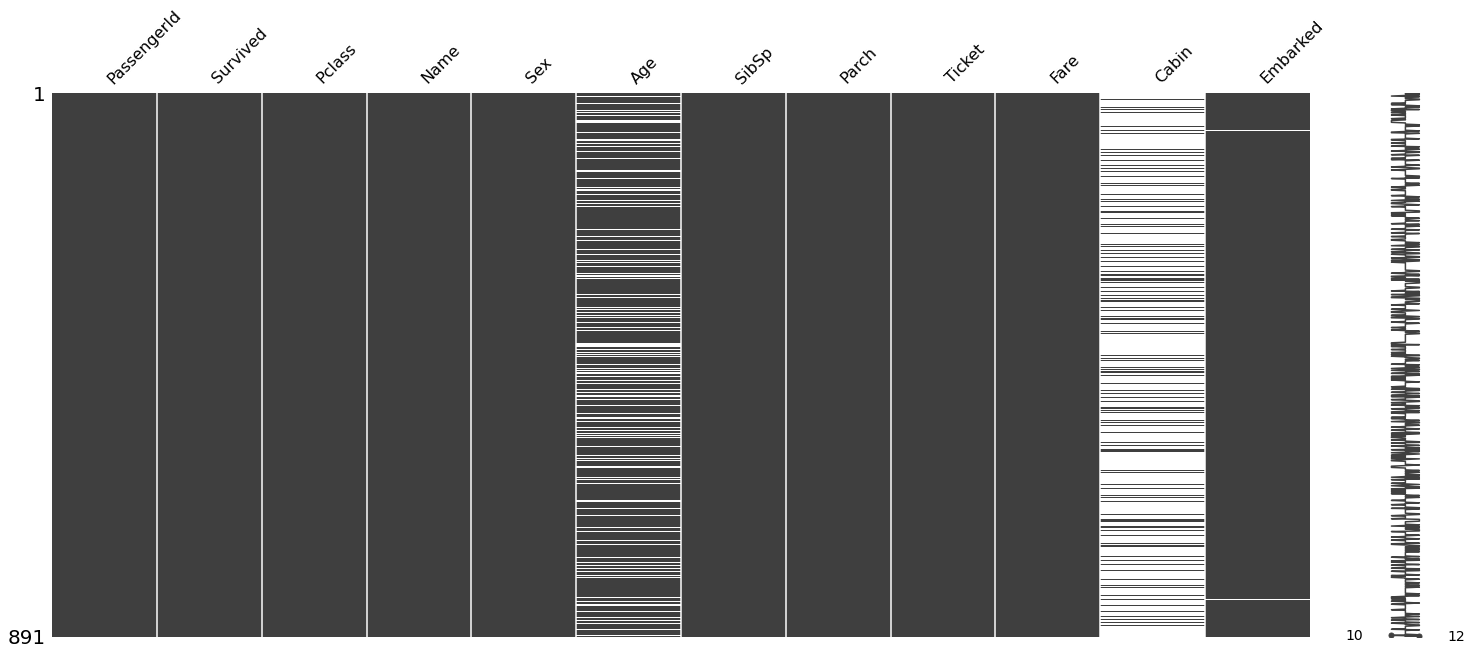

In [11]:
msno.matrix(training_data) # I am using missingno library which shows the similar result in a pictorial fashion with Age and Cabin Having Null values

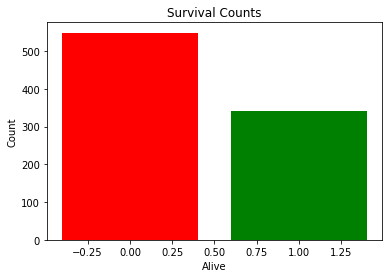

In [12]:
# Survival Counts for the Dataset
survival_counts = training_data['Survived'].value_counts()
plt.title('Survival Counts')
plt.xlabel('Alive')
plt.ylabel('Count')
plt.bar(survival_counts.index, survival_counts.values,color=['red','green'])
plt.show()

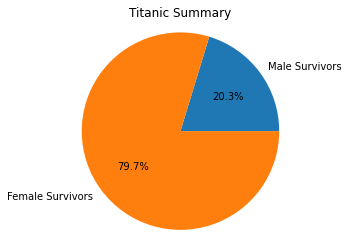

In [13]:
#From the above graph we understand that death rate was more.
female_survival_data = training_data.loc[training_data.Sex=='female']['Survived']

male_survival_data=  training_data.loc[training_data.Sex=='male']['Survived']

noOfMaleSurvivors= male_survival_data.mean()

noOfFemaleSurvivors = female_survival_data.mean()

dataForPieChart=[noOfMaleSurvivors,noOfFemaleSurvivors]

my_labels = 'Male Survivors','Female Survivors'

plt.pie(dataForPieChart,labels=my_labels,autopct='%1.1f%%')

plt.title('Titanic Summary')
plt.axis('equal')
plt.show()


<AxesSubplot:xlabel='Pclass'>

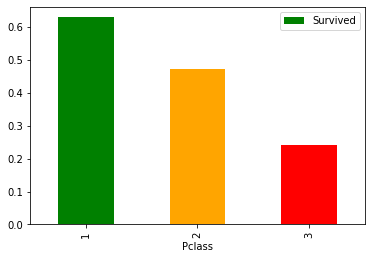

In [14]:
# From the above Pie chart We can observe that Death Rate was more in Male Passengers.


survivalBasedOnClass=training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

survivalBasedOnClass.plot(kind='bar',x='Pclass',y='Survived',color=['green','orange','red'])



In [15]:
# From the above bar graph we understand that Most of the people were dead who were travelling in Third Class 

#nunique() gives the number of unique values in each column. 

#Let's display all the unique features in our dataset

def displayUniqueFeatures(col):
    count = training_data[col].nunique()
    print('Unique features for %s: %d' % (col, count))
    if count < 50:
        print(training_data[col].unique())

#Let's display unique features in the dataset
for col in training_data.select_dtypes('object'):
    displayUniqueFeatures(col)


Unique features for Name: 891
Unique features for Sex: 2
['male' 'female']
Unique features for Ticket: 681
Unique features for Cabin: 147
Unique features for Embarked: 3
['S' 'C' 'Q' nan]


In [16]:
# Let's start with Data Cleaning.

# We are going to create a new column called Title which will be derived from Name.

titles_dict={
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Jonkheer":"Royalty",
    "Don" : "Royalty",
    "Dona":"Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Officer",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady": "Royalty" 
}    

# We split the name and based on their addressed name we derive title by mapping them to the above dictionary
def getTitleColumn(val):
    if(val == "Train"):
        training_data['Title']=training_data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
        training_data['Title']=training_data.Title.map(titles_dict) 
        return training_data
    else:
        test_data['Title']=test_data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
        test_data['Title']=test_data.Title.map(titles_dict) 
        return test_data

    
    

In [17]:
training_data=getTitleColumn("Train")
test_data=getTitleColumn("Test")
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [18]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [19]:
# Let's handle Age here now for training data.

train_grouped= training_data.groupby(['Sex','Pclass','Title'])
train_grouped_median= train_grouped.median()
train_grouped_median=train_grouped_median.reset_index()[['Sex','Pclass','Title','Age']]
train_grouped_median.head(10)

def predictAge(row):
    cond=((train_grouped_median['Sex']==row['Sex']) & 
         
         (train_grouped_median['Title']==row['Title']) &
          
          (train_grouped_median['Pclass']==row['Pclass']) 
         
         )
    
    if(np.isnan(train_grouped_median[cond]['Age'].values[0])):
        cond=((train_grouped_median['Sex']==row['Sex']) &
               (train_grouped_median['Pclass']==row['Pclass']) 
         )
    return train_grouped_median[cond]['Age'].values[0]


def age():
    global training_data
    training_data['Age']=training_data.apply(lambda row: predictAge(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return training_data

training_data= age()

training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [20]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [21]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [22]:
test_grouped= test_data.groupby(['Sex','Pclass','Title'])
test_grouped_median= test_grouped.median()
test_grouped_median=test_grouped_median.reset_index()[['Sex','Pclass','Title','Age']]
test_grouped_median.head(10)


def predictAgeForTest(row):
    global cond
    cond=((test_grouped_median['Sex']==row['Sex']) & 
         
         (test_grouped_median['Title']==row['Title']) &
          
          (test_grouped_median['Pclass']==row['Pclass']) 
         
         )
    
    if(np.isnan(test_grouped_median[cond]['Age'].values[0])):
        print(True)
        cond=((test_grouped_median['Sex']==row['Sex']) &
               (test_grouped_median['Pclass']==row['Pclass']) 
         )
    return test_grouped_median[cond]['Age'].values[0]


def ageForTest():
    global test_data
    test_data['Age']=test_data.apply(lambda row: predictAgeForTest(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return test_data

test_data= ageForTest()

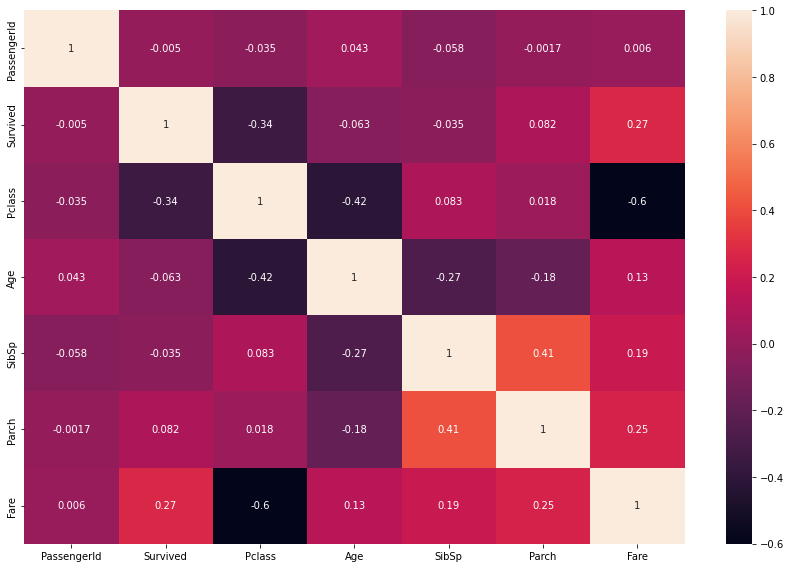

In [23]:
training_data['Embarked'].fillna(value="S", inplace=True)

#Let's handle Fare here for Both Training and Testing Data

merged_dataset =  pd.concat([training_data, test_data], sort=True).reset_index(drop=True)

fare_median = merged_dataset.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

test_data['Fare'].fillna(fare_median, inplace=True)
training_data.loc[training_data.Fare>512, 'Fare'] = 263


test_data['Embarked'].fillna(value="S", inplace=True)


# Correlation Matrix of features.

plt.figure(figsize=(12,8))
sns.heatmap(training_data.corr(), annot=True)
plt.tight_layout()



In [24]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [25]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [26]:

# Machine Learning algorithms only deal with numbers and not the categorical data(Strings or other Datatypes) 

# Categories for the attribute Sex
categoriesForGender={"female":1,"male":0}
training_data['Sex']=training_data['Sex'].map(categoriesForGender)
test_data['Sex']=test_data['Sex'].map(categoriesForGender)

# Categories for Embarked
categoriesForEmbarked={"S": 1, "C": 2, "Q": 3}

training_data['Embarked']= training_data['Embarked'].map(categoriesForEmbarked)
test_data['Embarked']= test_data['Embarked'].map(categoriesForEmbarked)

#Let's categorize each of our variables to numbers in Cabin

#catengoriesForCabi = training_data.Cabin.unique()
#training_data['Cabin'] = training_data.Cabin.astype("category").cat.codes
#test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

# We dropped Cabin because it had 70% missing values and even if impute them just like above we may end up loosing accuracy for our model.
training_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

# For Title we are using asType().cat.codes which is similar to groupBy or It does the functionality of a labelEnccoder.
training_data['Title'] = training_data.Title.astype("category").cat.codes

test_data['Title'] = test_data.Title.astype("category").cat.codes


#Drop Unnecessary columns from the dataset

training_data = training_data.drop(['Name','Ticket','PassengerId'], axis=1)


test_data= test_data.drop(['Name','Ticket','PassengerId'],axis=1)



training_data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,2
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,1
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,2


In [27]:
test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,3,2
1,3,1,47.0,1,0,7.0000,1,3
2,2,0,62.0,0,0,9.6875,3,2
3,3,0,27.0,0,0,8.6625,1,2
4,3,1,22.0,1,1,12.2875,1,3


In [28]:
training_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [29]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [30]:
#Now Let's build our model as we have Imputed or handled all of our Missing values

pipeline_randomForest=Pipeline([('scaler',MinMaxScaler()),
                                ('rfa',RandomForestClassifier())])

pipeline_logisticRegression=Pipeline([('scaler',MinMaxScaler()),
                                ('lrg',LogisticRegression())])

pipeline_SVM=Pipeline([('scaler',MinMaxScaler()),
                                ('lrg',SVC())])

pipeline_decisionTree=Pipeline([('scaler',MinMaxScaler()),
                                ('dt',DecisionTreeClassifier())])

pipeline_gradientBoost=Pipeline([('scaler',MinMaxScaler()),
                                ('gbc',GradientBoostingClassifier())])


pipeline_adaBoostClassifier=Pipeline([('scaler',MinMaxScaler()),
                                ('ad',AdaBoostClassifier())])


X = training_data.drop('Survived', axis=1)
Y = training_data.Survived


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=1)

pipeline_SVM.fit(X_train,y_train)
pipeline_randomForest.fit(X_train,y_train)
pipeline_logisticRegression.fit(X_train,y_train)
pipeline_decisionTree.fit(X_train,y_train)
pipeline_gradientBoost.fit(X_train,y_train)
pipeline_adaBoostClassifier.fit(X_train,y_train)



print('Highest score possible for Random Forest: {:.4f}'.format(pipeline_randomForest.score(X_test,y_test)))
print('Highest score possible for Logistic Regression: {:.4f}'.format(pipeline_logisticRegression.score(X_test,y_test)))
print('Highest score possible for Decision Tree: {:.4f}'.format(pipeline_decisionTree.score(X_test,y_test)))
print('Highest score possible for Gradient Boost: {:.4f}'.format(pipeline_gradientBoost.score(X_test,y_test)))
print('Highest score possible for SVM: {:.4f}'.format(pipeline_SVM.score(X_test,y_test)))
print('Highest score possible for ADA Boost Classifier: {:.4f}'.format(pipeline_adaBoostClassifier.score(X_test,y_test)))


#XGBoost Classifier

from xgboost.sklearn import XGBClassifier
model = XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=4, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score for XG Boost Classifier ", accuracy_score(y_pred,y_test))


#Hyper Parameter Tuning for Random Forest using GridSearchCV


param_grid_for_RF = {'rfa__n_estimators': [10,20,30,50,100,200,500], 
              'rfa__criterion': ['gini','entropy'], 
              'rfa__bootstrap': [True,False]}

model = GridSearchCV(pipeline_randomForest, param_grid_for_RF, scoring='accuracy')
model.fit(X_train,y_train)


print('Highest score possible after HyperParameter Tuning using RandomForest is : {:.4f}'.format(model.best_score_))

param_grid_for_DecisionTree = [
    {
        'dt__criterion': ['gini', 'entropy'],
        'dt__max_depth': range(4, 20, 2),
        'dt__max_leaf_nodes': range(4, 28, 2),
    }
]
gridSearchCv = GridSearchCV(pipeline_decisionTree, param_grid_for_DecisionTree, cv = 5, n_jobs = -1, verbose = 1)
gridSearchCv.fit(X_train,y_train)
print('Highest score possible after HyperParameter Tuning using DecisionTree is : {:.4f}'.format(gridSearchCv.best_score_))




params_for_gradientBoostClassifier = [
    {'gbc__n_estimators': range(12, 36, 4), 
     'gbc__max_depth': range(8, 24, 4),
     'gbc__max_leaf_nodes': range(8, 28, 4),
    }
]
gs_gb = GridSearchCV(pipeline_gradientBoost, params_for_gradientBoostClassifier, cv = 5, n_jobs = -1, verbose = 1)
gs_gb.fit(X_train, y_train)
print('Highest score possible after HyperParameter Tuning using GradientBoostClassifier is : {:.4f}'.format(gs_gb.best_score_))




parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}


model_adaboost = AdaBoostClassifier(
    random_state=42,
)


model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_adaboost.fit(X_train, y_train)
print('Highest score possible after HyperParameter Tuning using ADABoostClassifier is : {:.4f}'.format(model_adaboost.best_score_))


# We can see that GradientBoostClassifier is giving us the best accuracy after performing HyperParameterTuning and CrossValidation


#Let's print the best parameters for GradientBoostClassifier
for k, v in gs_gb.best_params_.items():
    print('%s: %s' % (k, v))







Highest score possible for Random Forest: 0.7687
Highest score possible for Logistic Regression: 0.7649
Highest score possible for Decision Tree: 0.7575
Highest score possible for Gradient Boost: 0.7836
Highest score possible for SVM: 0.7836
Highest score possible for ADA Boost Classifier: 0.7761


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appr

[20:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score for XG Boost Classifier  0.7835820895522388
Highest score possible after HyperParameter Tuning using RandomForest is : 0.8267
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Highest score possible after HyperParameter Tuning using DecisionTree is : 0.8379
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Highest score possible after HyperParameter Tuning using GradientBoostClassifier is : 0.8427
Highest score possible after HyperParameter Tuning using ADABoostClassifier is : 0.8283
gbc__max_depth: 8
gbc__max_leaf_nodes: 8
gbc__n_estimators: 32


In [31]:
# Let's create our output csv file and submit the predictions.
output = pd.DataFrame({'PassengerId': test_data.index + 892, 'Survived': gs_gb.predict(test_data)})
output.to_csv('gender_submission.csv', index=False)
output


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
